This document is taken from [nbcalc by Jacob Frias Koehler](https://buildmedia.readthedocs.org/media/pdf/calculus-notes/latest/calculus-notes.pdf).

In [1]:
import numpy as np
import sympy as sy
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets, fixed
%matplotlib inline

## Population Models

The simplest population model is that of exponential growth. In this model a population grows in direct proportion to itself and can be represented both in terms of discrete time steps and a continuous differential equation model, given by:

\begin{equation}
p_{n+1} = rp_n \qquad \frac{dP}{dt} = kP
\end{equation}

Additionally, we looked at a population model that considered the limiting behavior of decreased resources through the logistic equation. Again, we could describe this either based on a discrete model or a continuous model as given by:

\begin{equation}
p_{n+1} = m(L - p_n)p_n \qquad \frac{dP}{dt} = rP(1 - P)
\end{equation}

This model was interesting because of some unexpected behavior that we saw in the form of chaos. Today, we extend our discussion to population dynamics where we investigate predator prey relationships. Given some population of prey $x(t)$ and some population of prey $y(t)$ we aim to investigate the changes in these populations over time depending on the values of certain population parameters much like we did with the logistic model. In general, we will be exploring variations on a theme. The general system of equations given by:

\begin{align}
\frac{dx}{dt} &= f_1(t,x,y) - f_2(t,x,y)\\[1.5ex]
\frac{dy}{dt} &= f_3(t,x,y) - f_4(t,x,y)
\end{align}

Can be understood as describing the change in populations based on the difference between the increase in the populations $(f_1, f_3)$ and the decrease in the populations $(f_2, f_4)$.

### Lotka Voltera Model

Ann early example of a predator prey model is the Lotka Volterra model. We can follow Lotka’s
argument for the construction of the model. First, he assumed:
* In the absence of predators, prey should grow exponentially without bound
* In the absence of prey, predators population should decrease similarly
Thus, we have the following:

\begin{align}
\frac{dx}{dt} &= ax\\[1.5ex]
\frac{dy}{dt} &= -dy
\end{align}

where $a$, $d$ are some constants. Next, Lotka called on the Law of Mass Action from chemistry. When a reaction occurs by mixing chemicals, the law of mass action states that the rate of the reaction is proportional to the product of the quantities of the reactants. Lotka argued that prey should decrease and that predators should increase at rates proportional to the product of numbers present. Hence, we would have:

\begin{align}
\frac{dx}{dt} &= ax - bxy\\[1.5ex]
\frac{dy}{dt} &= cxy - dy
\end{align}

for some other constants $b$ and $c$.

In [2]:
def predator_prey(a=2,b=1,c=1,d=5):
    # Initial populations
    rabbits = [10]
    foxes = [20]

    a = a/1000.
    b = b/10000.
    c = c/10000.
    d = d/1000.
    
    dt = 0.1
    
    N = 20000
    for i in range (N):
        R = rabbits[-1]
        F = foxes[-1]
        change_rabbits = dt * (a*R - b*R*F)
        change_foxes = dt * (c*R*F - d*F)
        rabbits.append(rabbits[-1] + change_rabbits)
        foxes.append(foxes[-1] + change_foxes)
        
    plt.figure(figsize=(12,6))
    plt.plot(np.arange(N+1),rabbits,lw=3)
#     plt.hold(True)
    plt.plot(np.arange(N+1),foxes,lw=3)
    plt.ylim(0,200)
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend(('Rabbits','Foxes'), loc='best');

In [22]:
interact(predator_prey,a=widgets.FloatSlider(min=0.01,max=30,step=1,value=10.0),
                       b=widgets.FloatSlider(min=0.01,max=10,step=1,value=2.0),
                       c=widgets.FloatSlider(min=0.01,max=10,step=1,value=3.0),
                       d=widgets.FloatSlider(min=0.01,max=30,step=1,value=9.0));


interactive(children=(FloatSlider(value=10.0, description='a', max=30.0, min=0.01, step=1.0), FloatSlider(valu…

In [14]:
a = 1.
b = 0.1
c = 1.5
d = 0.75

def dX_dt(X, t=0):
    """ Return the growth rate of the fox and
    the rabbit populations. """
    return np.array([ a*X[0] - b*X[0]*X[1],
                  -c*X[1] + d*b*X[0]*X[1] ])

In [15]:
t = np.linspace(0, 15, 1000) # time
X0 = np.array([10, 5]) # initial conds: rabbits, foxes
X = odeint(dX_dt, X0, t)

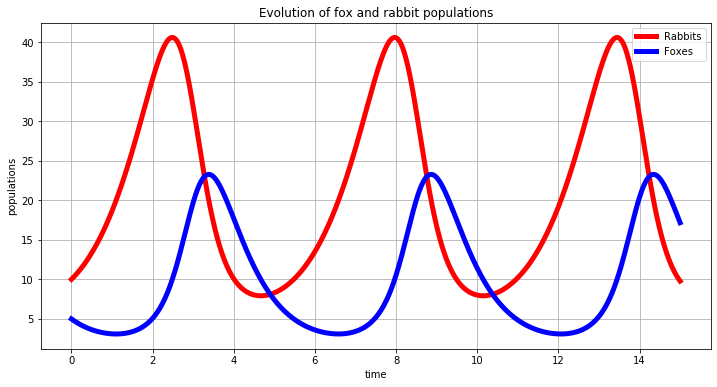

In [16]:
rabbits, foxes = X.T
f1 = plt.figure(figsize=(12,6))
plt.plot(t, rabbits, 'r-', lw=5, label='Rabbits')
plt.plot(t, foxes, 'b-', lw=5, label='Foxes')
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('populations')
plt.title('Evolution of fox and rabbit populations')
f1.savefig('rabbits_and_foxes_1.png')

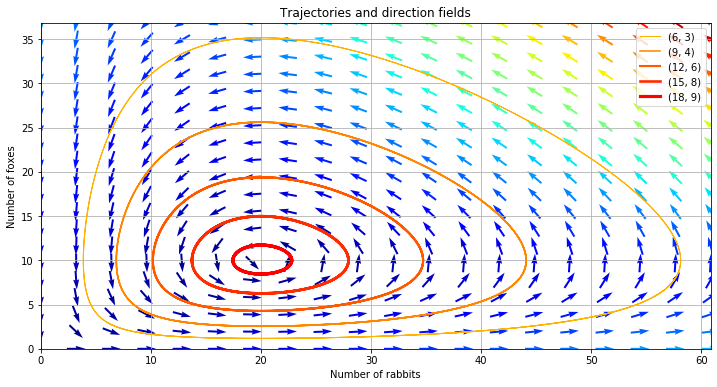

In [74]:
X_f0 = np.array([     0. ,  0.])
X_f1 = np.array([ c/(d*b), a/b]) # WHAT DOES THIS LINE DO???
all(dX_dt(X_f0) == np.zeros(2) ) and all(dX_dt(X_f1) == np.zeros(2)) # WHAT DOES THIS LINE DO???

values  = np.linspace(0.3, 0.9, 5)                          # position of X0 between X_f0 and X_f1
vcolors = plt.cm.autumn_r(np.linspace(0.3, 1., len(values)))  # colors for each trajectory

f2 = plt.figure(figsize=(12,6))

#-------------------------------------------------------
# plot trajectories
for v, col in zip(values, vcolors):
    X0 = v * X_f1                               # starting point
    X = odeint( dX_dt, X0, t)         # we don't need infodict here
#     plt.plot( X[:,0], X[:,1], lw=3.5*v, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )
    plt.plot( X[:,0], X[:,1], lw=3.5*v, color=col, label=f"({X0[0]:.0f}, {X0[1]:.0f})" )


#-------------------------------------------------------
# define a grid and compute direction at each point
ymax = plt.ylim(ymin=0)[1]                        # get axis limits
xmax = plt.xlim(xmin=0)[1]
nb_points   = 20

x = np.linspace(0, xmax, nb_points)
y = np.linspace(0, ymax, nb_points)

X1 , Y1  = np.meshgrid(x, y)                       # create a grid
DX1, DY1 = dX_dt([X1, Y1])                      # compute growth rate on the gridt
M = (np.hypot(DX1, DY1))                           # Norm of the growth rate
M[ M == 0] = 1.                                 # Avoid zero division errors
DX1 /= M                                        # Normalize each arrows
DY1 /= M

#-------------------------------------------------------
# Drow direction fields, using matplotlib 's quiver function
# I choose to plot normalized arrows and to use colors to give information on
# the growth speed
plt.title('Trajectories and direction fields')
Q = plt.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=plt.cm.jet)
plt.xlabel('Number of rabbits')
plt.ylabel('Number of foxes')
plt.legend()
plt.grid()
plt.xlim(0, xmax)
plt.ylim(0, ymax)
f2.savefig('rabbits_and_foxes_2.png')

In [25]:
A = np.random.randint(0,10,size=(5,5))
A

array([[6, 8, 0, 1, 6],
       [2, 2, 0, 4, 8],
       [7, 9, 3, 0, 3],
       [5, 2, 9, 9, 1],
       [3, 9, 4, 1, 1]])

In [68]:
# Example of using the 'zip()'' function

l1 = [1, 2, 3, 4]
l2 = ['one', 'two', 'three', 'four']

z1 = zip(l1, l2) # a 'zip object'; an iterator
l3 = list(zo)
l4 = list(zo)

# for digit, number in zo:
#     print(f"digit: {digit},\tnumber: {number}")
    
print(l3)
print(l4)

[]
[]


In [43]:
np.zeros(2)

array([0., 0.])

In [46]:
all(np.zeros(2)==[0,0])

True

In [47]:
?all

In [69]:
np.linspace(0.3, 0.9, 5)

array([0.3 , 0.45, 0.6 , 0.75, 0.9 ])